In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets, linear_model
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import tweepy
import json
from bs4 import BeautifulSoup
import requests

df=pd.read_csv('Database\CompleteDataset.csv')

C:\Users\Samuel\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
def arrumapreco(valor):  #função que retira todos os sinais(emocotions continuam)
    if "M" in valor:
        valor=valor.replace("M","000000")
        valor=valor.replace("€","")
        valor=valor.replace(".","")
    
    else:
        valor=valor.replace("K","000000")
        valor=valor.replace("€","")
        valor=valor.replace(".","")
        
    return int(valor)

def arrumaatt(att):
    if type(att) !=int:
        if "+" in att:
            att=att[:att.find("+")]
        elif "-" in att:
            att=att[:att.find("-")]
    return att
        
    
features = ['Potential', 'Acceleration']


y=df["Value"].apply(arrumapreco)

for i in features:
    df[i]=df[i].apply(arrumaatt)

    
X = df[features]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


ValueError: x and y must be the same size

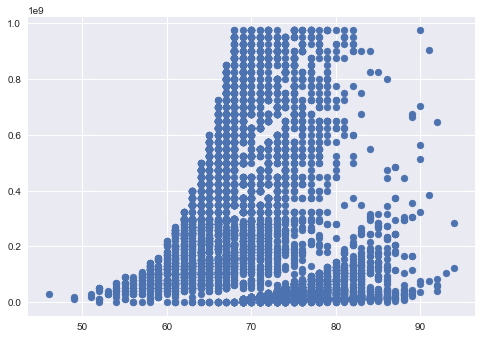

In [28]:
regr = linear_model.LinearRegression()# cria o modelo

regr.fit(X_train, y_train) # treina o modelo

xfit = X_train
yfit = regr.predict(X_train)

plt.scatter(X_train["Potential"],y_train)
plt.scatter(xfit, yfit)

#df

In [21]:
import numpy as np
import statsmodels.api as sm

type(X_train)
type(y_train)

yy = y_train
XX = X_train
XX = sm.add_constant(XX)

#np.asrray(X)

model = sm.OLS(yy, XX.astype(float)).fit()

model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     114.3
Date:                Thu, 16 Nov 2017   Prob (F-statistic):           1.29e-72
Time:                        07:43:19   Log-Likelihood:            -1.8751e+05
No. Observations:                8990   AIC:                         3.750e+05
Df Residuals:                    8986   BIC:                         3.751e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.887e+08   3.44e+07     22.927      0.000    7.21e+08    8.56e+08
Potential    -7.154e+06   5.21e+05    -13.731      0.000   -8.18e+06   -6.13e+06
Acceleration  2.455e+06   2.57e+05      9.540      0.000    1.95e+06    2.96e+06
Special      -1.047e+05   1.49e+04     -7.014      0.000   -1.34e+05   -7.54e+04
==============================================================================
Omnibus:                     1022.503   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1392.106
Skew:                           0.957   Prob(JB):                    5.10e-303
Kurtosis:                       2.768   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
estim = regr.predict(X)
df['Estim']=estim

df[["Name","Value","Estim"]]

,Name,Value,Estim
0,Cristiano Ronaldo,€95.5M,1.014951e+08
1,L. Messi,€105M,1.237578e+08
2,Neymar,€123M,1.271645e+08
3,L. Suárez,€97M,1.067552e+08
4,M. Neuer,€61M,1.166336e+08
5,R. Lewandowski,€92M,1.073071e+08
6,De Gea,€64.5M,1.178420e+08
7,E. Hazard,€90.5M,1.465908e+08
8,T. Kroos,€79M,6.552076e+07
9,G. Higuaín,€77M,1.310544e+08


In [23]:
def followers(user):
    url = 'https://www.twitter.com/'+user
    r = requests.get(url)
    soup = BeautifulSoup(r.content,"lxml")

    f = soup.find('li', class_="ProfileNav-item--followers")
    title = f.find('a')['title']

    num_followers = int(title.split(' ')[0].replace('.',''))
    print (num_followers)
    return num_followers

In [25]:
nome=df["Name"][0]
nome="Cristiano Ronaldo"
listtwitter=[]

for nome, team in zip(df["Name"], df["Club"]):
    print(nome)
    #print(team)
    search=""
    tsearch=""
    for i in nome.split():
        search+=i+"+"
    for i in team.split():
        tsearch+=i+"+"
        
    search=search[:-1]
    tsearch=tsearch[:-1]
    url = "https://www.google.com.br/search?q="+search+"+Twitter+Official"
    print(url)
    #print()
    r = requests.get(url)
    soup = BeautifulSoup(r.content,"lxml")

    a=soup.find_all('a')
    #print(url)
    
    for i in a:
        string=str(i)
        #print(string)
        #print(string)
        #print(type(string))
        if "twitter.com/" in string and "search" not in string:
            print(string)            
            twitter=string[string.find("@"):].split()[0][:-1]
            print(twitter)
            listtwitter.append(followers(twitter))
            break
    print()

Cristiano Ronaldo
https://www.google.com.br/search?q=Cristiano+Ronaldo+Twitter+Official
<a href="/url?q=https://twitter.com/cristiano&amp;sa=U&amp;ved=0ahUKEwiAsqjE58LXAhVLl5AKHfHLC-8QFggVMAA&amp;usg=AOvVaw28Hir6xlqP4kB35fp-Y5bU"><b>Cristiano Ronaldo</b> (@Cristiano) | <b>Twitter</b></a>
@Cristiano
63858475

L. Messi
https://www.google.com.br/search?q=L.+Messi+Twitter+Official
<a href="/url?q=https://twitter.com/messi10stats&amp;sa=U&amp;ved=0ahUKEwie3pvF58LXAhVCOZAKHR3FA6MQFggUMAA&amp;usg=AOvVaw3Voqff54S0WCCHFoPpuNSM"><b>Leo Messi</b> (@messi10stats) | <b>Twitter</b></a>
@messi10stats
1416611

Neymar
https://www.google.com.br/search?q=Neymar+Twitter+Official
<a href="/url?q=https://twitter.com/neymarjr&amp;sa=U&amp;ved=0ahUKEwi6jIjG58LXAhVEgJAKHVkcAacQFggUMAA&amp;usg=AOvVaw1oA87AxylMzAhHsh4bdDNo"><b>Neymar</b> Jr (@neymarjr) | <b>Twitter</b></a>
@neymarjr
35034998

L. Suárez
https://www.google.com.br/search?q=L.+Suárez+Twitter+Official
<a href="/url?q=https://twitter.com/luissuarez9&a

AttributeError: 'NoneType' object has no attribute 'find'

In [ ]:
listtwitter
